In [146]:
library(hise)
library(dplyr)
library(reshape2)
library(tidyr)
library(limma)
library(pheatmap)
library(ggplot2)
library(gridExtra)
library(tibble)
library(plotly)
library(readxl)
library(VennDiagram)
library(stringr)
library(grid)
library(UpSetR)
library(data.table)
library(fgsea)

In [147]:
#IL1B+ Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_expression_matrix_v2.csv")

In [180]:
#IL1B+ Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_expression_matrix_unscaled_v2.csv")

In [121]:
#Core Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Core_CD14_mono_Heatmap_expression_matrix_v1.csv")

In [134]:
#ISG+ Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/ISG_CD14_mono_Heatmap_expression_matrix_v1.csv")

In [134]:
#ISG+ Cd14 monocytes
df <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/ISG_CD14_mono_Heatmap_expression_matrix_v1.csv")

In [181]:
head(df)

,X,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MIR1302-2HG,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
2,FAM138A,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
3,OR4F5,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
4,AL627309.1,0,0,0,0,0,0,0,0,0,⋯,0,0,0.02579722,0,0,0.005713804,0,0,0,0
5,AL627309.3,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0
6,AL627309.2,0,0,0,0,0,0,0,0,0,⋯,0,0,0.00000000,0,0,0.000000000,0,0,0,0


In [182]:
meta_data <- read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks/Qiuyu-Notebooks/scRNA/hise_meta_data_2024-01-23_fixed.csv')
head(meta_data)
colnames(meta_data)

,X.1,X,lastUpdated,sample.id,sample.bridgingControl,sample.sampleKitGuid,sample.visitName,sample.visitDetails,sample.drawDate,sample.daysSinceFirstVisit,⋯,sample.diseaseStatesRecordedAtVisit,pbmc_sample_id,Sample_ID,Sample_Draw_date,Covid_Dose_1,Covid_Dose_2,Covid_exlcusion,BMI,file.name.downloaded,file.path
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00001-01,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5
2,2,2,2023-11-18T02:03:08.347Z,750e90a9-a296-4f0f-969f-60225c2bca17,false,KT00002,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00002-01,NA,2019-10-15,2020-12-28,2021-01-18,no,<25-BMI,B001-P1_PB00002-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/7c0c7979-eebd-4aba-b5b2-6e76b4643623/B001-P1_PB00002-01_labeled.h5
3,3,3,2023-11-18T02:03:08.347Z,2db6fb3f-e3f4-454b-891b-9b068541b51d,false,KT00003,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00003-01,NA,2019-10-15,2020-12-28,2021-01-16,no,<25-BMI,B001-P1_PB00003-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/40efd03a-cb2f-4677-af42-a056cbfe5a17/B001-P1_PB00003-01_labeled.h5
4,4,4,2023-11-19T10:34:34.12Z,f04693c5-563c-4b5b-ae58-877d0d9ae2fe,false,KT00004,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00004-01,NA,2019-10-21,2021-04-16,2021-05-06,no,<25-BMI,B002-P1_PB00004-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/68fbcd34-1d63-461d-8195-df5b8dc61b31/B002-P1_PB00004-01_2023-11-17T21:36:51.794326181Z_labeled.h5
5,5,5,2023-11-19T05:07:36.805Z,eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f,false,KT00006,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00006-01,NA,2019-10-23,2021-01-16,2021-02-26,no,<25-BMI,B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/ea8d98e9-e99e-4dc6-9e78-9866e0deac68/B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5
6,6,6,2023-11-18T02:03:08.347Z,f32ac061-0ede-4040-8d8c-35229ea5229c,false,KT00010,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,NA,PB00010-02,NA,2019-10-28,2021-03-21,2021-04-18,no,>25-30BMI,B078-P2_PB00010-02_2021-08-19T17:09:29.934849811Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/237e41df-5616-4852-8a8f-b32835c9efcb/B078-P2_PB00010-02_2021-08-19T17:09:29.934849811Z_labeled.h5


[1] "X.1"                                   
 [2] "X"                                     
 [3] "lastUpdated"                           
 [4] "sample.id"                             
 [5] "sample.bridgingControl"                
 [6] "sample.sampleKitGuid"                  
 [7] "sample.visitName"                      
 [8] "sample.visitDetails"                   
 [9] "sample.drawDate"                       
[10] "sample.daysSinceFirstVisit"            
[11] "file.id"                               
[12] "file.name"                             
[13] "file.batchID"                          
[14] "file.panel"                            
[15] "file.pool"                             
[16] "file.fileType"                         
[17] "file.majorVersion"                     
[18] "subject.id"                            
[19] "subject.biologicalSex"                 
[20] "subject.birthYear"                     
[21] "CMV.IgG.Serology.Result.Interpretation"
[22] "subject.ethnicity"                     
[23] "subject.partnerCode"                   
[24] "subject.race"                          
[25] "subject.subjectGuid"                   
[26] "cohort.cohortGuid"                     
[27] "sample.diseaseStatesRecordedAtVisit"   
[28] "pbmc_sample_id"                        
[29] "Sample_ID"                             
[30] "Sample_Draw_date"                      
[31] "Covid_Dose_1"                          
[32] "Covid_Dose_2"                          
[33] "Covid_exlcusion"                       
[34] "BMI"                                   
[35] "file.name.downloaded"                  
[36] "file.path"

In [183]:
filtered_data <- meta_data[, c("pbmc_sample_id", "CMV.IgG.Serology.Result.Interpretation","cohort.cohortGuid", "subject.biologicalSex" )]
filtered_data %>% head()
length(unique(filtered_data$pbmc_sample_id))

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
1,PB00001-01,Negative,BR1,Female
2,PB00002-01,Negative,BR1,Male
3,PB00003-01,Negative,BR1,Female
4,PB00004-01,Negative,BR1,Male
5,PB00006-01,Negative,BR1,Female
6,PB00010-02,Negative,BR1,Male


[1] 869

In [184]:
rownames(filtered_data) <- filtered_data$pbmc_sample_id
head(filtered_data)

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex
,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female
PB00002-01,PB00002-01,Negative,BR1,Male
PB00003-01,PB00003-01,Negative,BR1,Female
PB00004-01,PB00004-01,Negative,BR1,Male
PB00006-01,PB00006-01,Negative,BR1,Female
PB00010-02,PB00010-02,Negative,BR1,Male


In [185]:
# Create a new column by combining the two columns with "_"
filtered_data$facet <- paste(filtered_data$subject.biologicalSex, filtered_data$cohort.cohortGuid, sep = "_")

In [186]:
head(filtered_data)

,pbmc_sample_id,CMV.IgG.Serology.Result.Interpretation,cohort.cohortGuid,subject.biologicalSex,facet
,<chr>,<chr>,<chr>,<chr>,<chr>
PB00001-01,PB00001-01,Negative,BR1,Female,Female_BR1
PB00002-01,PB00002-01,Negative,BR1,Male,Male_BR1
PB00003-01,PB00003-01,Negative,BR1,Female,Female_BR1
PB00004-01,PB00004-01,Negative,BR1,Male,Male_BR1
PB00006-01,PB00006-01,Negative,BR1,Female,Female_BR1
PB00010-02,PB00010-02,Negative,BR1,Male,Male_BR1


# Building HeatMap:

## IL1B+ Cd14 monocyte

In [187]:
options(repr.plot.width=8, repr.plot.height=4) # Adjust these values as needed

# Subset for genes of interest
genes_of_interest <- c('G0S2','TNF', 'IL1B', 'NR4A1', 'PTGS2', 'BCL2A1', 'BCL6', 'NR4A1', 'METRNL', 'TNFRSF1B',
                                      'FKBP5', 'RBP7', 'UBE2D1', 'FCGR3A', 'CCL4', 'CCL4L2','NFKBID', 'LGALS2', 'CCR1','RASGEF1B', 
                                      'CXCL8', 'NLRP3', 'KLF6', 'EIF1AX', 'JUND') # Replace with any genes
df_subset <- df[df$X %in% genes_of_interest, ]
df_subset


,X,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
225,RBP7,0.6580341,0.8267947,1.0074245,1.1302947,0.77915792,1.00647253,1.3323505,1.0350740,0.5896210,⋯,0.9223510,0.7928386,1.06375205,0.8745921,0.7469651,1.0505479,0.0000000,1.0012400,1.37013869,0.7956115
275,TNFRSF1B,1.2646416,1.4997217,0.5726240,1.2851622,1.46080800,1.10197095,1.1686409,1.3712373,1.3730211,⋯,1.8054288,1.2157416,1.40579334,1.2816287,1.3333011,1.2994506,1.3842485,1.5909686,1.06614728,1.4928116
2206,FCGR3A,0.2063345,0.1896476,0.0000000,0.2181170,0.51237472,0.24582000,0.3546107,0.2299043,0.1221534,⋯,0.1265516,0.4667233,0.25003737,0.2149161,0.4477868,0.1793682,0.0000000,0.0000000,0.00000000,0.2199266
2472,PTGS2,0.4037394,0.3446376,0.1164149,1.1987074,0.34677196,1.24186075,0.4829994,0.2771626,0.5801127,⋯,0.7612107,0.6212935,0.50814002,0.5533753,0.8654874,0.4398782,1.8283400,0.6938911,0.38231979,0.6158994
2711,G0S2,0.3681518,1.2006851,0.0000000,0.5537455,0.06202377,0.68290521,0.5757327,0.4888096,0.2909091,⋯,0.8309336,0.7079901,0.27933399,0.3638164,0.0000000,0.8105501,1.2431300,0.4686418,0.36349363,0.1589934
3098,NLRP3,0.2194822,0.2702370,0.5425574,0.8469841,0.40963067,0.44083116,0.7558058,0.3235502,0.5995581,⋯,0.8466884,0.5237548,0.44509940,0.4961413,0.5655765,0.6804465,0.9365257,0.4126855,0.29654733,0.4815437
4347,IL1B,0.6693585,0.8664402,0.6734207,0.9965455,1.55288792,1.46812882,0.8223424,0.6474077,1.4278196,⋯,0.7570703,1.3217057,1.49715970,1.2916855,0.5953855,1.6441042,3.0959512,1.1244188,1.74867104,1.0121349
5818,CCR1,0.6832188,0.6309584,0.7315364,0.7241851,0.65655656,1.03271548,0.1646967,0.4112466,0.5779835,⋯,0.9057002,0.6002498,0.43270577,0.4550728,0.4235760,0.5106632,0.0000000,0.2232902,0.42976890,0.7072403
7027,BCL6,0.2864497,0.0000000,0.1164149,0.2293325,0.30909220,0.25190232,0.0000000,0.2310151,0.2772842,⋯,0.3184354,0.5080019,0.38466344,0.4732558,0.4159875,0.3119816,0.4820303,0.3280479,0.54754719,0.5206769


In [188]:
# Assuming your data frame is named df and the genes are in the 'X' column
# Transpose the data frame so that genes are rows and sample IDs are columns
#matrix <- t(df_subset[, -1])  # Exclude the first column ('X') before transposing

# Optionally, you can convert the gene names to row names
rownames(df_subset) <- df_subset$X
df_subset <- subset(df_subset, select = -X)
# Assuming your matrix is named 'mat'
colnames(df_subset) <- gsub("\\.", "-", colnames(df_subset))

df_subset

# Now, 'matrix' contains genes as row names and sample IDs as column names


,PB00001-01,PB00002-01,PB00003-01,PB00004-01,PB00006-01,PB00010-02,PB00012-01,PB00014-01,PB00015-01,PB00016-01,⋯,PB00592-01,PB00599-01,PB00600-01,PB00602-01,PB00621-01,PB00623-01,PB00625-02,PB00645-01,PB01425-01,PB01446-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,0.6580341,0.8267947,1.0074245,1.1302947,0.77915792,1.00647253,1.3323505,1.0350740,0.5896210,0.9786370,⋯,0.9223510,0.7928386,1.06375205,0.8745921,0.7469651,1.0505479,0.0000000,1.0012400,1.37013869,0.7956115
TNFRSF1B,1.2646416,1.4997217,0.5726240,1.2851622,1.46080800,1.10197095,1.1686409,1.3712373,1.3730211,1.5813378,⋯,1.8054288,1.2157416,1.40579334,1.2816287,1.3333011,1.2994506,1.3842485,1.5909686,1.06614728,1.4928116
FCGR3A,0.2063345,0.1896476,0.0000000,0.2181170,0.51237472,0.24582000,0.3546107,0.2299043,0.1221534,0.4049980,⋯,0.1265516,0.4667233,0.25003737,0.2149161,0.4477868,0.1793682,0.0000000,0.0000000,0.00000000,0.2199266
PTGS2,0.4037394,0.3446376,0.1164149,1.1987074,0.34677196,1.24186075,0.4829994,0.2771626,0.5801127,0.5792147,⋯,0.7612107,0.6212935,0.50814002,0.5533753,0.8654874,0.4398782,1.8283400,0.6938911,0.38231979,0.6158994
G0S2,0.3681518,1.2006851,0.0000000,0.5537455,0.06202377,0.68290521,0.5757327,0.4888096,0.2909091,0.8516766,⋯,0.8309336,0.7079901,0.27933399,0.3638164,0.0000000,0.8105501,1.2431300,0.4686418,0.36349363,0.1589934
NLRP3,0.2194822,0.2702370,0.5425574,0.8469841,0.40963067,0.44083116,0.7558058,0.3235502,0.5995581,0.5352163,⋯,0.8466884,0.5237548,0.44509940,0.4961413,0.5655765,0.6804465,0.9365257,0.4126855,0.29654733,0.4815437
IL1B,0.6693585,0.8664402,0.6734207,0.9965455,1.55288792,1.46812882,0.8223424,0.6474077,1.4278196,1.0405723,⋯,0.7570703,1.3217057,1.49715970,1.2916855,0.5953855,1.6441042,3.0959512,1.1244188,1.74867104,1.0121349
CCR1,0.6832188,0.6309584,0.7315364,0.7241851,0.65655656,1.03271548,0.1646967,0.4112466,0.5779835,0.5309352,⋯,0.9057002,0.6002498,0.43270577,0.4550728,0.4235760,0.5106632,0.0000000,0.2232902,0.42976890,0.7072403
BCL6,0.2864497,0.0000000,0.1164149,0.2293325,0.30909220,0.25190232,0.0000000,0.2310151,0.2772842,0.3401682,⋯,0.3184354,0.5080019,0.38466344,0.4732558,0.4159875,0.3119816,0.4820303,0.3280479,0.54754719,0.5206769


In [189]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV.IgG.Serology.Result.Interpretation", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV.IgG.Serology.Result.Interpretation))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV.IgG.Serology.Result.Interpretation = cmv_colors )


In [195]:
annotations_subset


,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


In [197]:
library(readr)
write_csv(annotations_subset, file = "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/IL1B_CD14_mono_Heatmap_metadata_for_groups.csv")


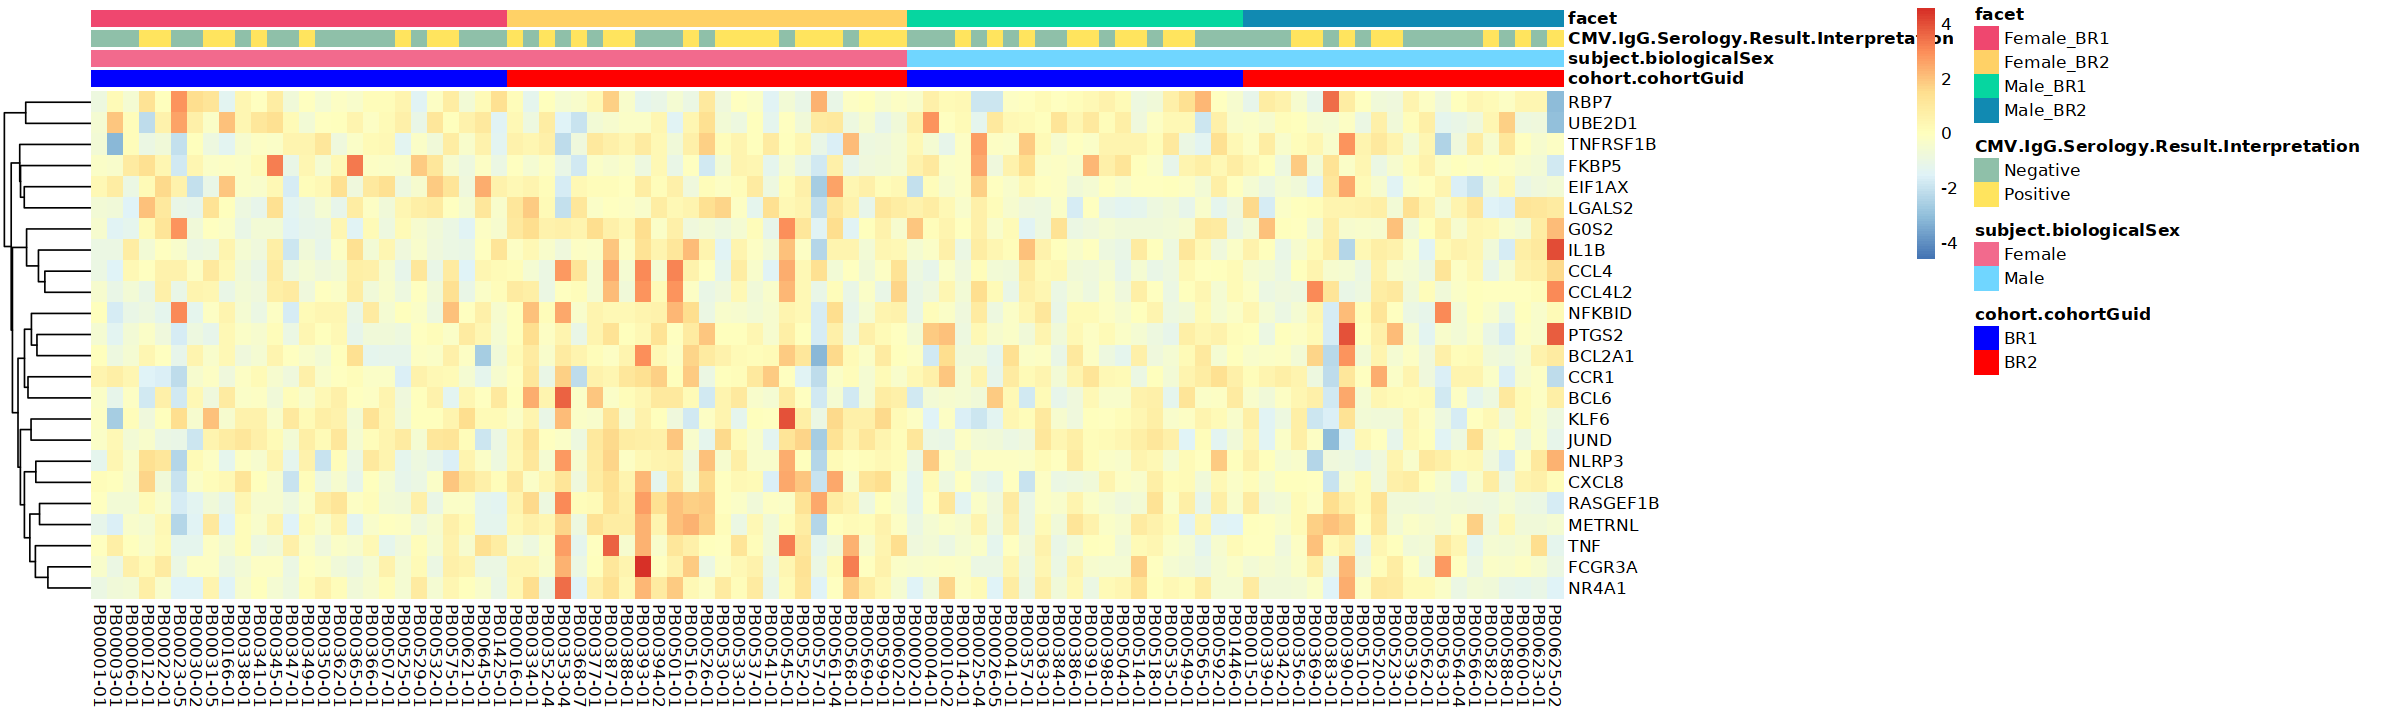

In [199]:
options(repr.plot.width=20, repr.plot.height=6)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Define a color palette
color_palette <- colorRampPalette(c("blue","blue", "white", "red", "red"))(101)

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_rows = "euclidean", 
         cluster_cols = FALSE, 
         #color = color_palette,
         scale = "row",  
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors
)


In [120]:
# options(repr.plot.width=20, repr.plot.height=6)

# # Define a color palette
# color_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# # Plot the heatmap with annotations
# pheatmap(df_subset, 
#          clustering_distance_cols = "none", 
#          cluster_cols = FALSE, 
#          color = color_palette,
#          scale = "row",
#          annotation_col = annotations_subset[, -1],
#          annotation_colors = annotation_colors
# )

## Core CD14 Monocytes

In [129]:
options(repr.plot.width=8, repr.plot.height=4) # Adjust these values as needed

# Subset for genes of interest
genes_of_interest <- c('G0S2','TNF', 'IL1B', 'NR4A1', 'PTGS2', 'BCL2A1', 'BCL6', 'NR4A1', 'METRNL', 'TNFRSF1B',
                                      'FKBP5', 'RBP7', 'UBE2D1', 'FCGR3A', 'CCL4', 'CCL4L2','NFKBID', 'LGALS2', 'CCR1','RASGEF1B', 
                                      'CXCL8', 'NLRP3', 'KLF6', 'EIF1AX', 'JUND') # Replace with any genes
df_subset <- df[df$X %in% genes_of_interest, ]
df_subset


,X,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,RBP7,-0.113009998,0.020983178,-0.3158553449,-0.184320077,-0.101812888,0.234452147,-0.17373510,0.008173707,-0.197963309,⋯,0.220534083,-0.092990758,-0.095159207,-0.08727950,-0.117055595,0.178847996,-0.09572426,0.139009965,0.11970311,0.200368701
111,FCGR3A,-0.150798919,-0.053837309,0.0009589151,-0.059411643,0.153458795,-0.091583741,-0.03804801,-0.079982681,-0.003045973,⋯,-0.105999527,0.091208077,0.094635685,0.08592888,-0.044274682,-0.021602366,-0.17821335,-0.028448760,0.08265241,-0.012493539
131,PTGS2,0.031090907,-0.001389387,0.0114612440,-0.077988400,-0.044933478,-0.060787799,-0.01836026,0.016538827,0.042040569,⋯,-0.078496914,-0.024385950,-0.016752057,-0.08095277,-0.135233368,0.011690208,0.02727201,-0.060794051,-0.09391384,-0.036597087
145,G0S2,0.028645220,0.174119055,-0.0294474359,-0.035167774,-0.081043192,-0.061312065,-0.06292875,0.273454418,-0.061696893,⋯,-0.057178794,0.087471296,-0.074966936,-0.07254658,-0.082716295,0.105070212,-0.01416192,0.024996219,-0.09059608,-0.037508501
226,IL1B,0.043710730,0.042701938,-0.0108693910,0.054376197,0.129089154,-0.020481535,0.17989276,0.122866371,0.059132020,⋯,-0.078829579,-0.006621455,0.107176644,-0.09062062,-0.000951683,0.063844535,-0.02118666,0.021205655,-0.06418337,0.020188540
308,CCR1,-0.084511944,-0.319077473,-0.0517781544,-0.134243155,0.086454917,-0.052463339,0.03652935,-0.129789024,0.094242893,⋯,0.053365416,0.016793905,-0.133621647,-0.09258402,0.016430733,0.123314103,-0.02784549,-0.030810048,-0.07580265,0.069522175
368,BCL6,-0.008575806,-0.260089253,-0.1007124128,-0.090014900,0.046732857,-0.133520204,0.02026672,-0.006169867,-0.099388229,⋯,-0.055447672,0.044510476,0.037087710,-0.04698945,-0.071655874,0.072515335,-0.03417915,-0.030696711,-0.08951746,0.161973617
404,CXCL8,0.289969719,0.184399102,0.1168105909,0.368240845,0.053239854,-0.109679054,0.18575059,0.147612281,0.066695326,⋯,-0.121443238,-0.015378374,-0.005693550,-0.14580045,-0.109605217,0.050325415,-0.13410831,0.004757851,-0.07729575,-0.065867985
413,RASGEF1B,-0.031040347,-0.095436082,-0.0499973289,-0.064487840,-0.059339692,-0.078277504,-0.03591246,-0.012294518,0.061682268,⋯,-0.007616489,0.040803210,-0.058759838,-0.02376650,-0.015849040,0.025119706,-0.03373354,0.104653210,-0.01706528,-0.027099359


In [130]:
# Assuming your data frame is named df and the genes are in the 'X' column
# Transpose the data frame so that genes are rows and sample IDs are columns
#matrix <- t(df_subset[, -1])  # Exclude the first column ('X') before transposing

# Optionally, you can convert the gene names to row names
rownames(df_subset) <- df_subset$X
df_subset <- subset(df_subset, select = -X)
# Assuming your matrix is named 'mat'
colnames(df_subset) <- gsub("\\.", "-", colnames(df_subset))

df_subset

# Now, 'matrix' contains genes as row names and sample IDs as column names


,PB00001-01,PB00002-01,PB00003-01,PB00004-01,PB00006-01,PB00010-02,PB00012-01,PB00014-01,PB00015-01,PB00016-01,⋯,PB00592-01,PB00599-01,PB00600-01,PB00602-01,PB00621-01,PB00623-01,PB00625-02,PB00645-01,PB01425-01,PB01446-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,-0.113009998,0.020983178,-0.3158553449,-0.184320077,-0.101812888,0.234452147,-0.17373510,0.008173707,-0.197963309,0.098360521,⋯,0.220534083,-0.092990758,-0.095159207,-0.08727950,-0.117055595,0.178847996,-0.09572426,0.139009965,0.11970311,0.200368701
FCGR3A,-0.150798919,-0.053837309,0.0009589151,-0.059411643,0.153458795,-0.091583741,-0.03804801,-0.079982681,-0.003045973,-0.009193916,⋯,-0.105999527,0.091208077,0.094635685,0.08592888,-0.044274682,-0.021602366,-0.17821335,-0.028448760,0.08265241,-0.012493539
PTGS2,0.031090907,-0.001389387,0.0114612440,-0.077988400,-0.044933478,-0.060787799,-0.01836026,0.016538827,0.042040569,0.055677015,⋯,-0.078496914,-0.024385950,-0.016752057,-0.08095277,-0.135233368,0.011690208,0.02727201,-0.060794051,-0.09391384,-0.036597087
G0S2,0.028645220,0.174119055,-0.0294474359,-0.035167774,-0.081043192,-0.061312065,-0.06292875,0.273454418,-0.061696893,0.317677447,⋯,-0.057178794,0.087471296,-0.074966936,-0.07254658,-0.082716295,0.105070212,-0.01416192,0.024996219,-0.09059608,-0.037508501
IL1B,0.043710730,0.042701938,-0.0108693910,0.054376197,0.129089154,-0.020481535,0.17989276,0.122866371,0.059132020,-0.034596520,⋯,-0.078829579,-0.006621455,0.107176644,-0.09062062,-0.000951683,0.063844535,-0.02118666,0.021205655,-0.06418337,0.020188540
CCR1,-0.084511944,-0.319077473,-0.0517781544,-0.134243155,0.086454917,-0.052463339,0.03652935,-0.129789024,0.094242893,0.014751431,⋯,0.053365416,0.016793905,-0.133621647,-0.09258402,0.016430733,0.123314103,-0.02784549,-0.030810048,-0.07580265,0.069522175
BCL6,-0.008575806,-0.260089253,-0.1007124128,-0.090014900,0.046732857,-0.133520204,0.02026672,-0.006169867,-0.099388229,-0.220844019,⋯,-0.055447672,0.044510476,0.037087710,-0.04698945,-0.071655874,0.072515335,-0.03417915,-0.030696711,-0.08951746,0.161973617
CXCL8,0.289969719,0.184399102,0.1168105909,0.368240845,0.053239854,-0.109679054,0.18575059,0.147612281,0.066695326,0.014307917,⋯,-0.121443238,-0.015378374,-0.005693550,-0.14580045,-0.109605217,0.050325415,-0.13410831,0.004757851,-0.07729575,-0.065867985
RASGEF1B,-0.031040347,-0.095436082,-0.0499973289,-0.064487840,-0.059339692,-0.078277504,-0.03591246,-0.012294518,0.061682268,0.099765923,⋯,-0.007616489,0.040803210,-0.058759838,-0.02376650,-0.015849040,0.025119706,-0.03373354,0.104653210,-0.01706528,-0.027099359


In [131]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV.IgG.Serology.Result.Interpretation", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV.IgG.Serology.Result.Interpretation))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV.IgG.Serology.Result.Interpretation = cmv_colors )


In [132]:
annotations_subset

,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


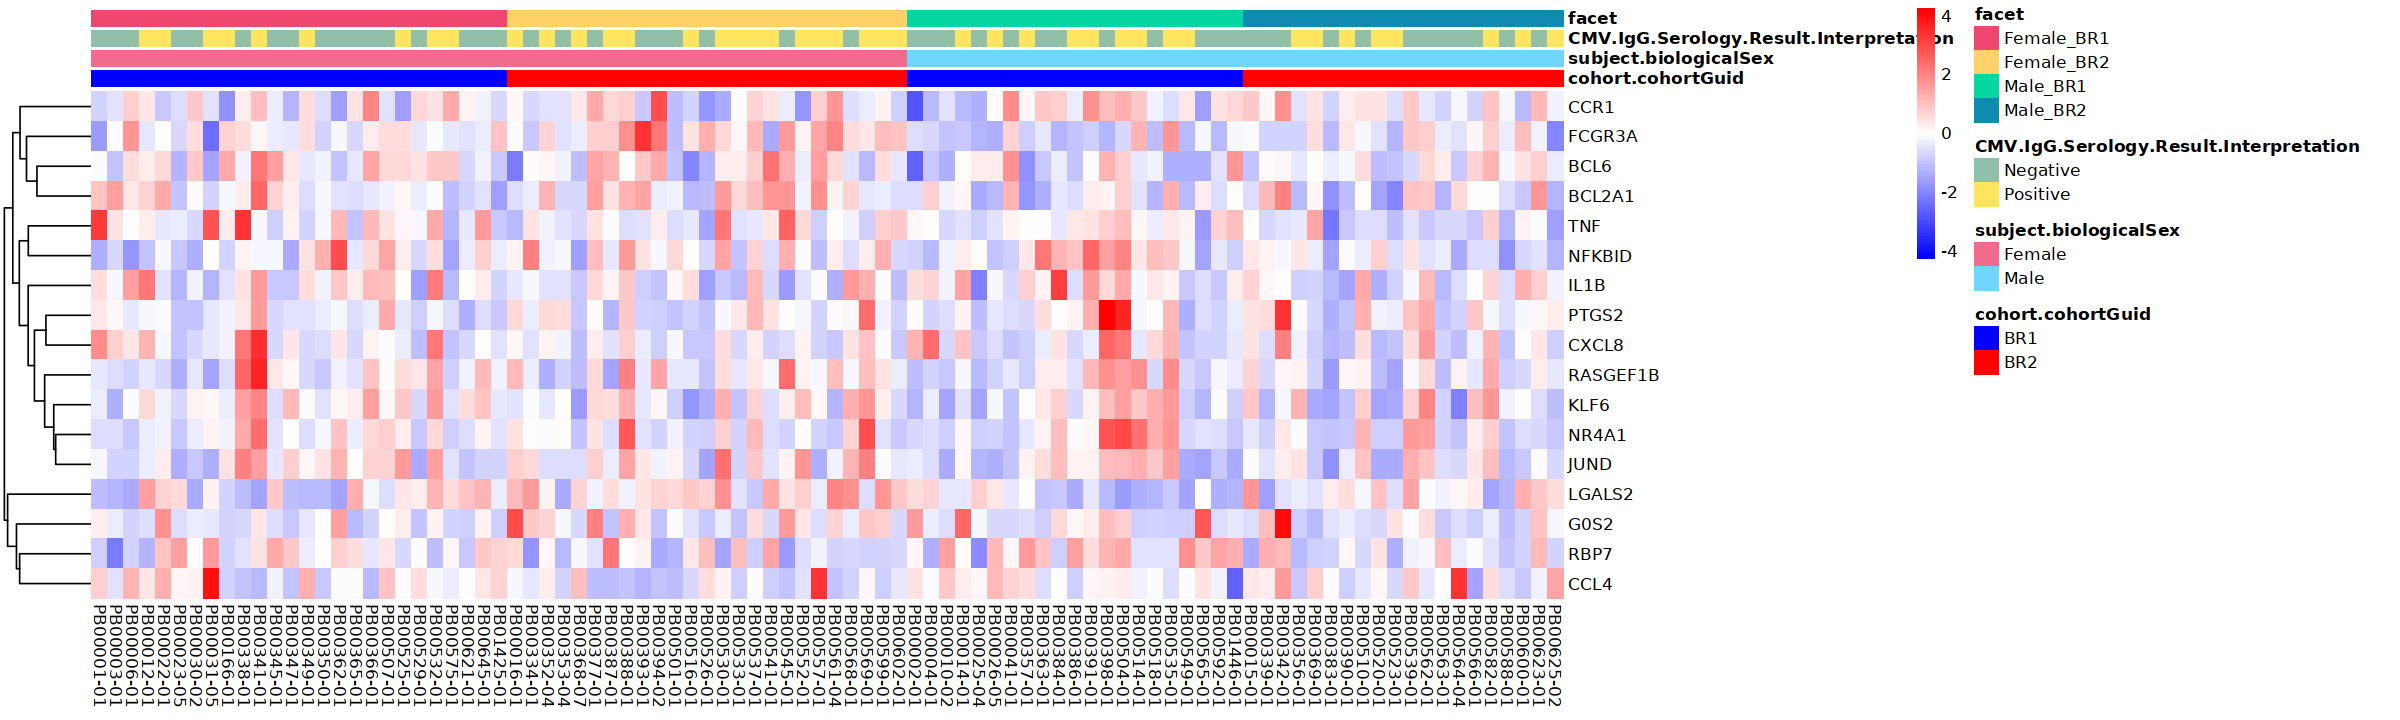

In [133]:
options(repr.plot.width=20, repr.plot.height=6)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_cols = "none", 
         cluster_cols = FALSE, 
         color = color_palette,
         scale = "row",
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors
)


## ISG+ CD14 Monocytes

In [141]:
options(repr.plot.width=8, repr.plot.height=4) # Adjust these values as needed

# Subset for genes of interest
genes_of_interest <- c('G0S2','TNF', 'IL1B', 'NR4A1', 'PTGS2', 'BCL2A1', 'BCL6', 'NR4A1', 'METRNL', 'TNFRSF1B',
                                      'FKBP5', 'RBP7', 'UBE2D1', 'FCGR3A', 'CCL4', 'CCL4L2','NFKBID', 'LGALS2', 'CCR1','RASGEF1B', 
                                      'CXCL8', 'NLRP3', 'KLF6', 'EIF1AX', 'JUND') # Replace with any genes
df_subset <- df[df$X %in% genes_of_interest, ]
df_subset


,X,PB00001.01,PB00002.01,PB00003.01,PB00004.01,PB00006.01,PB00010.02,PB00012.01,PB00014.01,PB00015.01,⋯,PB00592.01,PB00599.01,PB00600.01,PB00602.01,PB00621.01,PB00623.01,PB00625.02,PB00645.01,PB01425.01,PB01446.01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,RBP7,-0.26564748,0.04120083,-0.307516416,-0.1150552793,-0.15769204,0.043177739,-0.320474863,-0.18486945,-0.172635032,⋯,0.30656446,-0.03426523,-0.14403260,-0.058442913,0.09520527,0.19999483,-0.07859568,0.16391702,0.109802855,0.036138501
115,FCGR3A,-0.19270780,-0.19892640,0.031188013,-0.0710044548,0.15796770,-0.115492925,-0.009282281,-0.08608272,-0.050359629,⋯,-0.17542176,0.31115440,0.05811367,-0.028166707,-0.20168854,-0.10279455,-0.24283954,-0.16172503,0.091650685,0.318950636
134,PTGS2,0.05502537,0.07704324,-0.015700023,-0.1024795000,-0.04802574,-0.114273679,-0.125003550,-0.01706911,-0.067824418,⋯,-0.11340498,0.02424562,-0.03093696,-0.087439299,-0.08029038,0.01758771,-0.01722217,-0.03950693,-0.089959543,0.005901092
146,G0S2,-0.02255213,0.19492327,0.013516116,0.0005721444,-0.05517502,-0.108282186,-0.108282186,0.03799165,-0.086404394,⋯,-0.06290664,0.14773541,-0.05608073,-0.054009952,0.03517940,0.27028969,-0.10828219,0.08061348,-0.108282186,-0.073001928
228,IL1B,0.04009982,-0.09771339,-0.077584715,0.0376753786,0.10615211,-0.002719649,-0.073220246,0.07014199,0.202003751,⋯,-0.06033043,-0.04895131,0.05919523,-0.050995084,-0.09920754,0.10408057,0.15892867,-0.06809877,0.035188568,0.076668215
299,CCR1,-0.20005079,-0.43129720,-0.104662945,-0.1590486369,-0.08907479,-0.099898920,0.019724699,-0.10340594,0.009543219,⋯,-0.03335819,-0.11225735,-0.14531412,-0.108952779,0.15550023,0.05872445,-0.16999949,-0.12331325,-0.104370321,0.171301539
354,BCL6,0.03707529,-0.25004889,-0.028505749,-0.0711243051,0.07487106,-0.118073303,-0.069346879,-0.07213617,-0.019330292,⋯,-0.01521716,0.05460818,0.07220187,-0.082723082,-0.01075086,0.10966735,-0.12084721,-0.03811419,-0.110341439,0.111679387
383,CXCL8,0.31107158,0.28999251,0.194292091,0.1178705086,0.05877169,-0.126981828,0.023109382,0.15750155,0.180798435,⋯,-0.06039952,-0.01380549,0.01633571,-0.151016383,-0.06065097,0.20792839,-0.12948509,-0.05852592,0.062397654,-0.129498539
394,RASGEF1B,0.08484562,-0.08233608,-0.023220207,-0.1360951094,-0.13502848,-0.145903154,-0.071213252,-0.04063291,0.083965972,⋯,-0.03429153,0.13339232,-0.07633882,0.006642275,-0.21847175,-0.03412300,-0.25120644,0.01115216,-0.143023964,0.081091074


In [142]:
# Assuming your data frame is named df and the genes are in the 'X' column
# Transpose the data frame so that genes are rows and sample IDs are columns
#matrix <- t(df_subset[, -1])  # Exclude the first column ('X') before transposing

# Optionally, you can convert the gene names to row names
rownames(df_subset) <- df_subset$X
df_subset <- subset(df_subset, select = -X)
# Assuming your matrix is named 'mat'
colnames(df_subset) <- gsub("\\.", "-", colnames(df_subset))

df_subset

# Now, 'matrix' contains genes as row names and sample IDs as column names


,PB00001-01,PB00002-01,PB00003-01,PB00004-01,PB00006-01,PB00010-02,PB00012-01,PB00014-01,PB00015-01,PB00016-01,⋯,PB00592-01,PB00599-01,PB00600-01,PB00602-01,PB00621-01,PB00623-01,PB00625-02,PB00645-01,PB01425-01,PB01446-01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RBP7,-0.26564748,0.04120083,-0.307516416,-0.1150552793,-0.15769204,0.043177739,-0.320474863,-0.18486945,-0.172635032,0.302585161,⋯,0.30656446,-0.03426523,-0.14403260,-0.058442913,0.09520527,0.19999483,-0.07859568,0.16391702,0.109802855,0.036138501
FCGR3A,-0.19270780,-0.19892640,0.031188013,-0.0710044548,0.15796770,-0.115492925,-0.009282281,-0.08608272,-0.050359629,0.213689087,⋯,-0.17542176,0.31115440,0.05811367,-0.028166707,-0.20168854,-0.10279455,-0.24283954,-0.16172503,0.091650685,0.318950636
PTGS2,0.05502537,0.07704324,-0.015700023,-0.1024795000,-0.04802574,-0.114273679,-0.125003550,-0.01706911,-0.067824418,-0.032187050,⋯,-0.11340498,0.02424562,-0.03093696,-0.087439299,-0.08029038,0.01758771,-0.01722217,-0.03950693,-0.089959543,0.005901092
G0S2,-0.02255213,0.19492327,0.013516116,0.0005721444,-0.05517502,-0.108282186,-0.108282186,0.03799165,-0.086404394,0.236301557,⋯,-0.06290664,0.14773541,-0.05608073,-0.054009952,0.03517940,0.27028969,-0.10828219,0.08061348,-0.108282186,-0.073001928
IL1B,0.04009982,-0.09771339,-0.077584715,0.0376753786,0.10615211,-0.002719649,-0.073220246,0.07014199,0.202003751,-0.062445081,⋯,-0.06033043,-0.04895131,0.05919523,-0.050995084,-0.09920754,0.10408057,0.15892867,-0.06809877,0.035188568,0.076668215
CCR1,-0.20005079,-0.43129720,-0.104662945,-0.1590486369,-0.08907479,-0.099898920,0.019724699,-0.10340594,0.009543219,0.075052817,⋯,-0.03335819,-0.11225735,-0.14531412,-0.108952779,0.15550023,0.05872445,-0.16999949,-0.12331325,-0.104370321,0.171301539
BCL6,0.03707529,-0.25004889,-0.028505749,-0.0711243051,0.07487106,-0.118073303,-0.069346879,-0.07213617,-0.019330292,-0.145725943,⋯,-0.01521716,0.05460818,0.07220187,-0.082723082,-0.01075086,0.10966735,-0.12084721,-0.03811419,-0.110341439,0.111679387
CXCL8,0.31107158,0.28999251,0.194292091,0.1178705086,0.05877169,-0.126981828,0.023109382,0.15750155,0.180798435,-0.119939623,⋯,-0.06039952,-0.01380549,0.01633571,-0.151016383,-0.06065097,0.20792839,-0.12948509,-0.05852592,0.062397654,-0.129498539
RASGEF1B,0.08484562,-0.08233608,-0.023220207,-0.1360951094,-0.13502848,-0.145903154,-0.071213252,-0.04063291,0.083965972,0.026658108,⋯,-0.03429153,0.13339232,-0.07633882,0.006642275,-0.21847175,-0.03412300,-0.25120644,0.01115216,-0.143023964,0.081091074


In [143]:
# # Order columns by BR1 and BR2
# cols <- colnames(df_subset)
# #br1_cols <- cols[grep("^BR1", cols)]
# #br2_cols <- cols[grep("^BR2", cols)]
# #new_order <- c(br1_cols, br2_cols)
# df_ordered <- df_subset[, new_order]

# Subset filtered_meta to match the column names in df_ordered
annotations <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), ]

# Create a subset with only Age, Sex and CMV annotations
annotations_subset <- filtered_data[filtered_data$pbmc_sample_id %in% colnames(df_subset), c("pbmc_sample_id", "cohort.cohortGuid", "subject.biologicalSex", "CMV.IgG.Serology.Result.Interpretation", "facet")]

# Order annotations in the same order as df_ordered columns
annotations_subset <- annotations_subset[match(colnames(df_subset), annotations_subset$pbmc_sample_id), ]

## Define the specific order for facet
facet_order <- c("Female_BR1", "Female_BR2", "Male_BR1", "Male_BR2")

# Convert facet to factor with specific order
annotations_subset$facet <- factor(annotations_subset$facet, levels = facet_order)

# Reorder annotations_subset by facet
annotations_subset <- annotations_subset[order(annotations_subset$facet), ]

# Define color palettes for annotations (adjust colors as per your data)
cohort_colors <- setNames(c("blue", "red"), unique(annotations_subset$cohort.cohortGuid))
sex_colors <- setNames(c("#f26a8d", "#70d6ff"), unique(annotations_subset$subject.biologicalSex))
facet_colors <- setNames(c("#ef476f", "#ffd166", "#06d6a0", "#118ab2"), facet_order)
cmv_colors <- setNames(c( "#8fc0a9", "#ffe45e"), unique(annotations_subset$CMV.IgG.Serology.Result.Interpretation))

# Combine color mappings into a list
annotation_colors <- list(cohort.cohortGuid = cohort_colors, 
                          subject.biologicalSex = sex_colors, 
                          facet = facet_colors,
                        CMV.IgG.Serology.Result.Interpretation = cmv_colors )


In [144]:
annotations_subset

,pbmc_sample_id,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation,facet
,<chr>,<chr>,<chr>,<chr>,<fct>
PB00001-01,PB00001-01,BR1,Female,Negative,Female_BR1
PB00003-01,PB00003-01,BR1,Female,Negative,Female_BR1
PB00006-01,PB00006-01,BR1,Female,Negative,Female_BR1
PB00012-01,PB00012-01,BR1,Female,Positive,Female_BR1
PB00022-01,PB00022-01,BR1,Female,Positive,Female_BR1
PB00023-05,PB00023-05,BR1,Female,Negative,Female_BR1
PB00030-02,PB00030-02,BR1,Female,Negative,Female_BR1
PB00031-05,PB00031-05,BR1,Female,Positive,Female_BR1
PB00166-01,PB00166-01,BR1,Female,Positive,Female_BR1


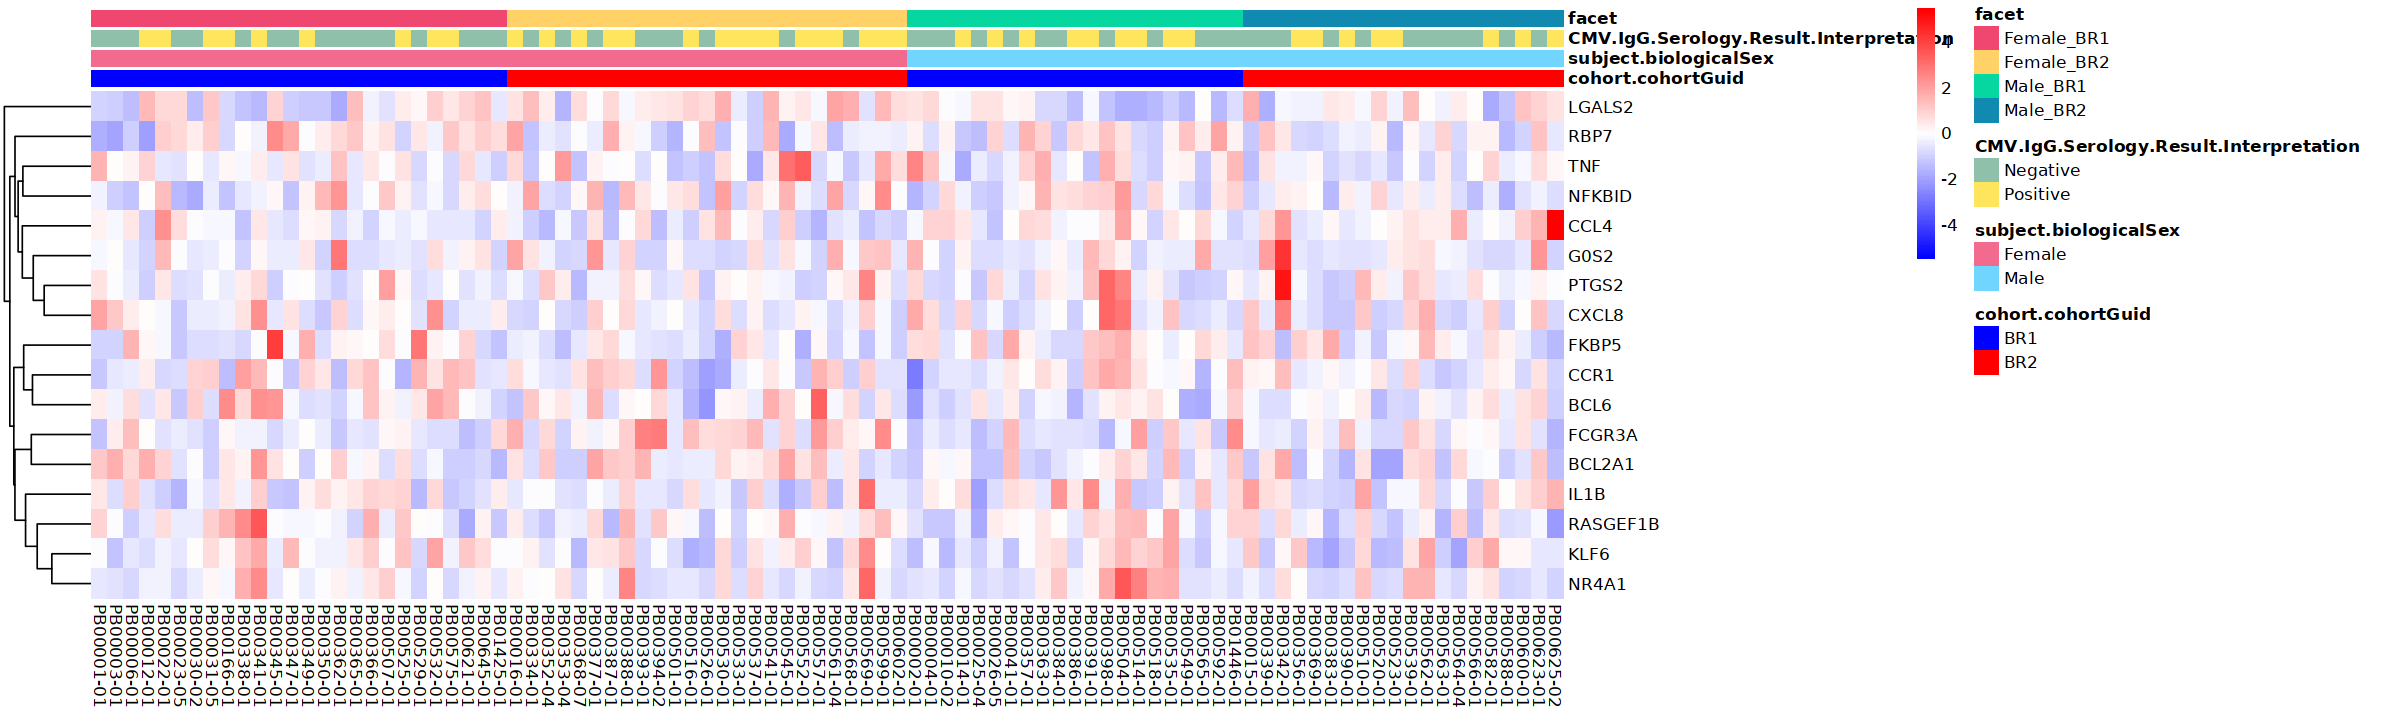

In [145]:
options(repr.plot.width=20, repr.plot.height=6)

# Get the order of pbmc_sample_id from annotations_subset
sample_order <- annotations_subset$pbmc_sample_id

# Reorder the columns of df_subset
df_subset_ordered <- df_subset[, sample_order]

# Plot the heatmap with reordered columns
pheatmap(df_subset_ordered, 
         clustering_distance_cols = "none", 
         cluster_cols = FALSE, 
         color = color_palette,
         scale = "row",
         annotation_col = annotations_subset[, -1],
         annotation_colors = annotation_colors
)
